#**Технологии регрессионного анализа данных**

# **1. Парная линейная регрессионная модель**

**Исходные данные находяться в файле Варианты_1.rar.**

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

Прочитать файл с исходными данными и записать его в таблицу df.

In [227]:
df = pd.read_csv("22_1.csv")
df.head()

,x,y
0,-5.000000,-650.176051
1,-4.964789,-433.727882
2,-4.929577,-560.920003
3,-4.894366,-821.517139
4,-4.859155,-386.690937


Построить диагрмму рассеяния.

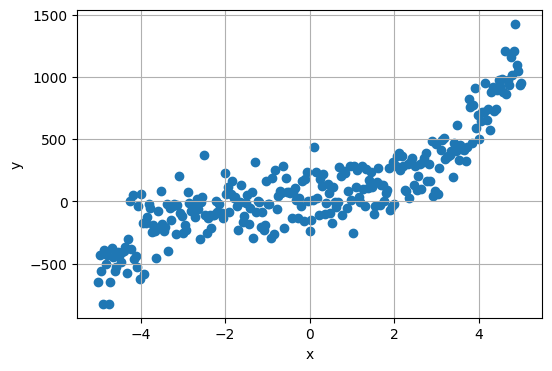

In [228]:
plt.figure(figsize = (6,4))
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

Записать уравнение предполагаемой зависимости.


$$ y=ax^3+bx^2+cx+d $$

$$ y = ax_1+bx_2+cx+d $$

Оценить наличие и степень зависимости с использованием количественных показателей (вычислить коэффициент корреляции).

In [229]:
from scipy.stats import pearsonr, spearmanr, kendalltau
print('Пирсон:', pearsonr(df['x'],df['y'])[0])
print('Спирман:', spearmanr(df['x'], df['y'])[0])

Пирсон: 0.8439770186790716
Спирман: 0.8491723991353345


Сформировать обучающую и тестовую выбороки. Записать полученные данные в таблицы df_train и df_test.

In [230]:
df['x^3'] = df['x'] ** 3
df['x^2'] = df['x'] ** 2
df.head(10)

,x,y,x^3,x^2
0,-5.000000,-650.176051,-125.000000,25.000000
1,-4.964789,-433.727882,-122.377709,24.649127
2,-4.929577,-560.920003,-119.792351,24.300734
3,-4.894366,-821.517139,-117.243664,23.954820
4,-4.859155,-386.690937,-114.731386,23.611387
5,-4.823944,-502.100955,-112.255255,23.270432
6,-4.788732,-426.959443,-109.815010,22.931958
7,-4.753521,-821.014656,-107.410388,22.595963
8,-4.718310,-645.097259,-105.041128,22.262448
9,-4.683099,-371.030467,-102.706967,21.931412


In [231]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, X2_train, X2_test, X_train, X_test, Y_train, Y_test,  = train_test_split(df['x^3'],df['x^2'], df['x'], df['y'],test_size = 0.3, random_state = 42)
df_train = pd.DataFrame({'x^3':X3_train,'x^2':X2_train,'x':X_train,'y':Y_train,}).reset_index(drop = True)

df_test = pd.DataFrame({'x^3':X3_test,'x^2':X2_test,'x':X_test,'y':Y_test}).reset_index(drop = True)

df_train.head()

,x^3,x^2,x,y
0,2.793991,1.983733,1.408451,175.558117
1,-28.747676,9.384299,-3.063380,-93.947513
2,-1.178715,1.115850,-1.056338,-186.395402
3,21.524162,7.737800,2.781690,161.188485
4,-49.107180,13.410038,-3.661972,-236.648738


На данных обучающей выборки оценить парметры предполагаемой регрессионной модели методом наименьших квадратов с использованием библиотеки `sklearn`.

In [232]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df_train[['x','x^2','x^3']], df_train['y'])

coefficients = model.coef_
intercept = model.intercept_

Вывести полученные параметры модели.

In [233]:
print("Коэффициенты при переменных: ", coefficients)
print("Коэффицикент свободный: ", intercept)

Коэффициенты при переменных:  [11.84316982 10.06814397  6.63594998]
Коэффицикент свободный:  27.14576340542213


Найти прогнозное значение целевого признака для произвольного значения независимого признака, которое не использовалось при обучении модели регрессии.

In [234]:
x_test_value = df_test.iloc[7][['x','x^2', 'x^3',]].values.reshape(1, -1)

y_pred = model.predict(x_test_value)

print(f"Прогнозное значение целевого признака для x = {x_test_value[0][2]}: y = {y_pred[0]}")


Прогнозное значение целевого признака для x = 0.9583388048984255: y = 54.96814791833171


На данных тестовой выборки оценить качество полученной модели регрессии с использованием средней квадратической ошибки и коэффициента детерминации.

In [235]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(df_test[['x', 'x^2','x^3']])

mse = mean_squared_error(df_test['y'], y_pred)
print("Средняя квадратическая ошибка (MSE):", mse)

r2 = r2_score(df_test['y'], y_pred)
print("Коэффициент детерминации (R2): ", r2)

Средняя квадратическая ошибка (MSE): 18377.655192557766
Коэффициент детерминации (R2):  0.8811234865100614


# **2. Недообучение и переобучение модели регрессии**

**Исходные данные находяться в файле Варианты_2.rar.**

Прочитать файл с исходными данными и записать его в таблицу df1.

In [236]:
df1 = pd.read_csv("22_2.csv")

In [237]:
df1.head()

,x,y
0,0.000000,0.192605
1,0.043478,0.274232
2,0.086957,1.419656
3,0.130435,1.710741
4,0.173913,2.724640


Построить диаграмму рассеяния.

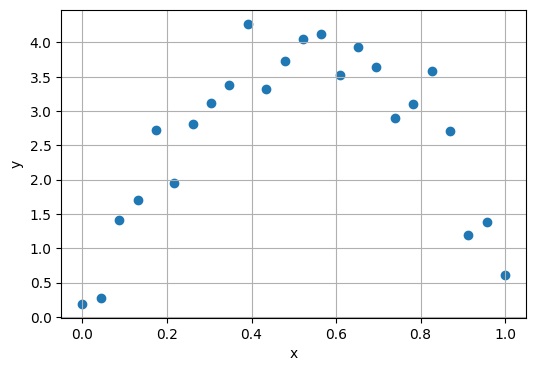

In [238]:
plt.figure(figsize = (6,4))
plt.scatter(df1['x'], df1['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

Сформировать обучающую и тестовую выбороки. Объем тестовой выборки должен составлять 20% от объема исходных данных.

Записать полученные данные в таблицы df1_train и df1_test.

In [239]:
X_train1, X_test1, Y_train1, Y_test1,  = train_test_split(df1['x'], df1['y'],test_size = 0.2, random_state = 42)
df1_train = pd.DataFrame({'x':X_train1,'y':Y_train1,}).reset_index(drop = True)

df1_test = pd.DataFrame({'x':X_test1,'y':Y_test1}).reset_index(drop = True)

In [240]:
df1_train.head()


,x,y
0,0.391304,4.273325
1,0.565217,4.127306
2,0.043478,0.274232
3,0.913043,1.199895
4,0.217391,1.953588


In [241]:
df1_test.head()

,x,y
0,0.347826,3.382225
1,0.695652,3.635656
2,0.000000,0.192605
3,0.782609,3.097172
4,0.478261,3.722817


## Линейная модель

Обучить модель парной линейной регрессии на данных обучающей выборки.

In [242]:
model1_lin = LinearRegression()
model1_lin.fit(df1_train[['x']], df1_train['y'])

LinearRegression()

In [243]:
model1_lin.coef_, model1_lin.intercept_

(array([0.21033561]), 2.5041892188625035)

In [244]:
y_train_mod = model1_lin.predict(df1_train[['x']])
y_test_mod = model1_lin.predict(df1_test[['x']])

In [245]:
y_train_mod

array([2.58649446, 2.62307456, 2.51333425, 2.69623478, 2.54991435,
       2.52247927, 2.61392954, 2.64136462, 2.5316243 , 2.54076932,
       2.7053798 , 2.65965467, 2.68708975, 2.71452483, 2.5682044 ,
       2.59563948, 2.63221959, 2.67794472, 2.55905938])

Добавить на диаграмму рассеяния график полученной зависимости.

(-0.1, 1.2)

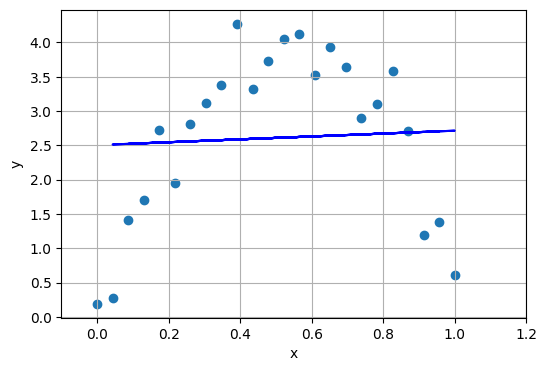

In [246]:
plt.figure(figsize = (6,4))
plt.scatter(df1['x'], df1['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.plot(df1_train[['x']], y_train_mod, 'b-')
plt.xlim(-0.1,1.2)

На данных обучающей и тестовой выборок оценить качество полученной модели регрессии с использованием средней квадратической ошибки и коэффициента детерминации.

In [247]:
print("MSE: ", mean_squared_error(df1_train['y'], y_train_mod))
print('R2: ', model1_lin.score(df1_train[['x']], df1_train['y']))

MSE:  1.4268907515178817
R2:  0.0028964841031361432


In [248]:
print("MSE: ", mean_squared_error(df1_test['y'], y_test_mod))
print('R2: ', model1_lin.score(df1_test[['x']], df1_test['y']))

MSE:  1.6790517439306492
R2:  0.04333331046533928


## Полиномиальная модель

Вычислить члены полинома k-го порядка для тренировочного и тестового набора данных. Величина k выбирается равной количеству объектов в тренировочном наборе данных.

При вычислении использовать параметры `interaction_only = False` и `include_bias = False`.

Записать полученные значения в таблицы.

In [249]:
df1_train.count()

,0
x,19
y,19


In [250]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(19, include_bias = False, interaction_only = False)

In [251]:
x_train_pol = pol.fit_transform(df1_train[['x']])
x_test_pol = pol.fit_transform(df1_test[['x']])
df1_train_pol = pd.DataFrame(x_train_pol)
df1_test_pol = pd.DataFrame(x_test_pol)

In [252]:
df1_train_pol.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.391304,0.153119,0.059916,0.023445,0.009174,0.00359,0.001405,0.00055,0.000215,0.000084,0.000033,0.000013,0.000005,0.000002,7.721828e-07,3.021585e-07,1.182359e-07,4.626623e-08,1.810418e-08


In [253]:
df1_test_pol.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.347826,0.120983,0.042081,0.014637,0.005091,0.001771,0.000616,0.000214,0.000075,0.000026,0.000009,0.000003,0.000001,3.793762e-07,1.319569e-07,4.589807e-08,1.596455e-08,5.552885e-09,1.931438e-09


Обучить модель полиномиальной регрессии на данных обучающей выборки.

In [254]:
df1_train = df1_train.sort_values(by = 'x')
df1_test = df1_test.sort_values(by = 'x')

In [255]:
model_pol = LinearRegression()
model_pol.fit(df1_train_pol, df1_train['y'])
model_pol.coef_, model_pol.intercept_

(array([-9.48909619e+05,  3.00648210e+07, -5.46865290e+08,  6.46460036e+09,
        -5.31012809e+10,  3.15477661e+11, -1.38877563e+12,  4.58701496e+12,
        -1.13828083e+13,  2.09352965e+13, -2.73288488e+13,  2.20283486e+13,
        -3.34636895e+12, -1.76901751e+13,  2.66360250e+13, -2.07990252e+13,
         9.82758137e+12, -2.66869545e+12,  3.22107783e+11]),
 12745.250351228597)

In [256]:
y2_train_mod = model_pol.predict(df1_train_pol)
y2_test_mod = model_pol.predict(df1_test_pol)

Добавить на диаграмму рассеяния график полученной зависимости.

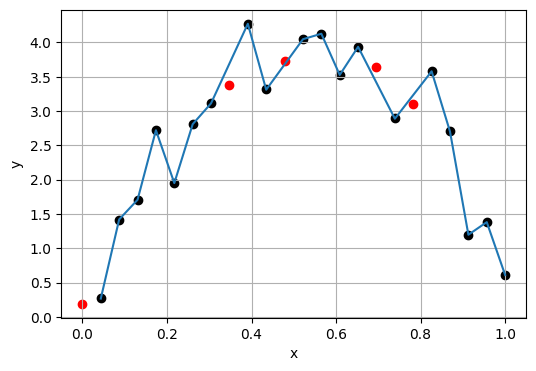

In [257]:
plt.figure(figsize = (6,4))
plt.scatter(df1_train['x'], df1_train[['y']], color = 'black')
plt.scatter(df1_test['x'], df1_test[['y']], color = 'red')
plt.plot(df1_train['x'],y2_train_mod)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

На данных обучающей и тестовой выборок оценить качество полученной модели регрессии с использованием средней квадратической ошибки и коэффициента детерминации.

In [258]:
print("MSE: ", mean_squared_error(df1_train['y'], y2_train_mod))
print('R2: ', model_pol.score(df1_train_pol, df1_train['y']))

MSE:  9.06144235948283e-06
R2:  0.99999366791324


In [259]:
print("MSE: ", mean_squared_error(df1_test['y'], y2_test_mod))
print('R2: ', model_pol.score(df1_test_pol, df1_test['y']))

MSE:  32469330.916527353
R2:  -18499921.609057255


# **3. Регуляризация полиномиальной модели регрессии**

Вывести коэффициенты полученной в п. 2 полиномиальной модели регрессии.

In [260]:
model_pol.coef_, model_pol.intercept_

(array([-9.48909619e+05,  3.00648210e+07, -5.46865290e+08,  6.46460036e+09,
        -5.31012809e+10,  3.15477661e+11, -1.38877563e+12,  4.58701496e+12,
        -1.13828083e+13,  2.09352965e+13, -2.73288488e+13,  2.20283486e+13,
        -3.34636895e+12, -1.76901751e+13,  2.66360250e+13, -2.07990252e+13,
         9.82758137e+12, -2.66869545e+12,  3.22107783e+11]),
 12745.250351228597)

Выбрать один из методов регуляризации L1 или L2.

Оценить оптимальное значение параметра регуляризации.

In [261]:
pol = PolynomialFeatures(3, include_bias = False, interaction_only = False)
x_train_pol2 = pol.fit_transform(df1_train[['x']])
x_test_pol2 = pol.fit_transform(df1_test[['x']])
df1_train_pol2 = pd.DataFrame(x_train_pol2)
df1_test_pol2 = pd.DataFrame(x_test_pol2)

In [262]:
model_p2 = LinearRegression()
model_p2.fit(df1_train_pol2, df1_train['y'])
y_train_mod_p2 = model_p2.predict(df1_train_pol2)
y_test_mod_p2 = model_p2.predict(df1_test_pol2)

In [263]:
alph = np.arange(0.0001,0.1,0.01)
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=alph, cv=3)
ridge_cv.fit(df1_train_pol2, df1_train['y'])
ridge_cv.alpha_

0.0001

Обучить модель полиномиальной регрессии на данных обучающей выборки с использованием найденного значения параметра регуляризации.

In [264]:
y_train_mod_L2 = ridge_cv.predict(df1_train_pol2)
y_test_mod_L2 = ridge_cv.predict(df1_test_pol2)

Вывести коэффициенты регуляризованной модели регрессии.

In [265]:
ridge_cv.coef_,ridge_cv.intercept_

(array([ 13.5675113 , -10.14645362,  -2.8231899 ]), 0.0673988220726458)

Добавить на диаграмму рассеяния график полученной зависимости.

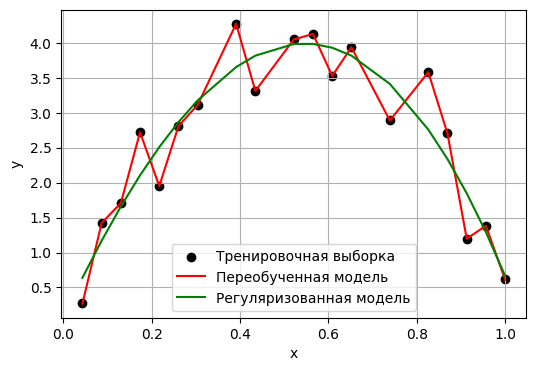

In [266]:
plt.figure(figsize=(6,4))
plt.scatter(df1_train['x'],df1_train[['y']], color = 'black', label = "Тренировочная выборка")
plt.plot(df1_train['x'],y2_train_mod, color = 'red',label = 'Переобученная модель')
plt.plot(df1_train['x'], y_train_mod_L2, color = 'green', label = 'Регуляризованная модель')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

На данных обучающей и тестовой выборок оценить качество полученной регуляризованной модели регрессии с использованием средней квадратической ошибки и коэффициента детерминации.

In [267]:
print("MSE: ", mean_squared_error(df1_train['y'], y_train_mod_L2))
print('R2: ', ridge_cv.score(df1_train_pol2, df1_train['y']))


MSE:  0.17068354126795945
R2:  0.8807272673657967


In [268]:
print("MSE: ", mean_squared_error(df1_test['y'], y_test_mod_L2))
print('R2: ', ridge_cv.score(df1_test_pol2, df1_test['y']))

MSE:  0.012209622171982817
R2:  0.993043371732907


# **4. Отбор информативных признаков для включения в модель**

**Исходные данные находяться в файле Варианты_3.rar.**

Прочитать файл с исходными данными и записать его в таблицу df2.

Заменить индексы столбцов обозначениями независимых признаков $x_1$, $x_2$ и т.д.

In [269]:
df2 = pd.read_csv('22_3.csv')
df2 = df2.rename(columns = {'0':'x1','1':'x2','2':'x3','3':'x4','4':'x5','5':'x6','6':'x7','y':'y'})

In [270]:
df2.head()

,x1,x2,x3,x4,x5,x6,x7,y
0,-0.362552,4.172609,0.391738,-3.935837,-2.395928,-0.474804,-6.141490,-9.280979
1,3.047115,2.900277,-3.480358,1.876543,3.689262,-0.011356,4.037214,7.012868
2,1.504510,-0.211329,0.630116,1.263164,-1.313880,-2.189125,-3.340054,0.237151
3,5.790379,4.500512,-3.361990,-6.378056,0.402952,0.020982,-0.989882,-1.109828
4,1.451584,3.814539,5.568574,-5.589784,-2.759937,-1.929546,-3.182585,-3.673119


Сформировать обучающую и тестовую выбороки. Объем тестовой выборки должен составлять 20% от объема исходных данных.

Записать полученные данные в таблицы df2_train и df2_test.

In [271]:
X1_train2, X1_test2,Y_train2, Y_test2 =train_test_split(df2[['x1','x2','x3','x4','x5','x6','x7']], df2['y'],test_size = 0.2, random_state = 42)
X1_train2.head()


,x1,x2,x3,x4,x5,x6,x7
345,-1.082073,-4.600720,9.581625,2.628178,0.529064,-2.885730,-2.640424
192,-2.620153,1.612209,-1.265968,2.253751,4.145605,-2.263826,3.669232
75,-13.340735,2.201125,-0.883151,0.586002,-2.108171,-0.738860,4.997306
84,-1.146645,-2.974532,-2.545234,-0.016916,-2.344810,-1.317481,-5.368945
358,-0.945037,-8.332014,-2.130519,-5.700399,-2.393257,0.578146,-2.951539


In [272]:
df2_train = pd.DataFrame({'x1':X1_train2['x1'],'x2':X1_train2['x2'],'x3':X1_train2['x3'],'x4':X1_train2['x4'],'x5':X1_train2['x5'],'x6':X1_train2['x6'],'x7':X1_train2['x7'],'y':Y_train2}).reset_index(drop = True)
df2_test = pd.DataFrame({'x1':X1_test2['x1'],'x2':X1_test2['x2'],'x3':X1_test2['x3'],'x4':X1_test2['x4'],'x5':X1_test2['x5'],'x6':X1_test2['x6'],'x7':X1_test2['x7'],'y':Y_test2}).reset_index(drop = True)


Обучить модель множественной регрессии на тренировочных данных.

In [273]:
model_m = LinearRegression()
model_m.fit(X1_train2,Y_train2)

LinearRegression()

Вывести параметры обученной модели множественной регрессии.

In [274]:
model_m.coef_, model_m.intercept_

(array([0.75387252, 0.00952729, 0.03711902, 0.89816061, 0.11513432,
        0.02184628, 0.40593736]),
 -0.252087842676077)

Оценить качество полученной модели множественной регрессии на обучающей и тестовой выборках.

In [275]:
y_m_train_mod = model_m.predict(X1_train2)
y_m_test_mod = model_m.predict(X1_test2)

In [276]:
print("MSE: ", mean_squared_error(df2_train['y'], y_m_train_mod))
print('R2: ', model_m.score(X1_train2, Y_train2))

MSE:  8.28533120544475
R2:  0.7755409056239434


In [277]:
print("MSE: ", mean_squared_error(df2_test['y'], y_m_test_mod))
print('R2: ', model_m.score(X1_test2, Y_test2))

MSE:  5.698622909605486
R2:  0.8190249341621316


Провести анализ дисперсии независимых признаков. Исключить из обучающего набора данных признаки, которые имеют дисперсию меньше 5.

In [278]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 5)
selector.fit(X1_train2)

VarianceThreshold(threshold=5)

In [279]:
selector.variances_

array([23.91953153, 10.49074002, 18.07567745, 17.38337919,  8.33421806,
       11.16796051,  9.07995834])

Для независимых признаков построить корреляционную матрицу, содержащую коэффициенты парной корреляции Пирсона.

In [280]:
X1_train2.corr()

,x1,x2,x3,x4,x5,x6,x7
x1,1.000000,0.079055,0.056213,-0.096922,0.429767,0.216569,0.056986
x2,0.079055,1.000000,-0.259859,0.192500,0.094314,-0.029214,-0.113854
x3,0.056213,-0.259859,1.000000,0.230956,0.004290,-0.432847,-0.094301
x4,-0.096922,0.192500,0.230956,1.000000,0.182450,-0.365313,-0.048593
x5,0.429767,0.094314,0.004290,0.182450,1.000000,0.132662,0.223417
x6,0.216569,-0.029214,-0.432847,-0.365313,0.132662,1.000000,0.120660
x7,0.056986,-0.113854,-0.094301,-0.048593,0.223417,0.120660,1.000000


Вычислить коэффициенты парной корреляции Пирсона между независимыми и целевым признаком.

In [281]:
X1_train2.corrwith(Y_train2)

,0
x1,0.586569
x2,0.146840
x3,0.177168
x4,0.560327
x5,0.475137
x6,-0.061562
x7,0.216610


In [282]:
from sklearn.feature_selection import r_regression
r_regression(X1_train2,Y_train2, center = False)

array([ 0.58491099,  0.15378459,  0.17732872,  0.56126181,  0.47570986,
       -0.0667715 ,  0.21924802])

Вычислить стандартизованные коэффициенты модели множественной регрессии с помощью выражения вида:

$$b^*_i = b_i \cdot \frac{s_x}{s_y}$$

In [283]:
Bst = []
for i in range (X1_train2.shape[1]):
  bst = model_m.coef_[i]*(X1_train2.iloc[:,i].std()/Y_train2.std())
  Bst.append(bst)
Bst

[0.606859162771518,
 0.005079091803981403,
 0.02597511190806261,
 0.6163604608088306,
 0.054708007409970894,
 0.01201650263245399,
 0.20133284091236076]

Построить диаграмму, отражающую степень важности независимых признаков.

In [284]:
importances = np.abs(Bst)
indices = np.argsort(importances)[::-1]
indices

array([3, 0, 6, 4, 2, 5, 1])

Text(0.5, 1.0, 'Важность признаков')

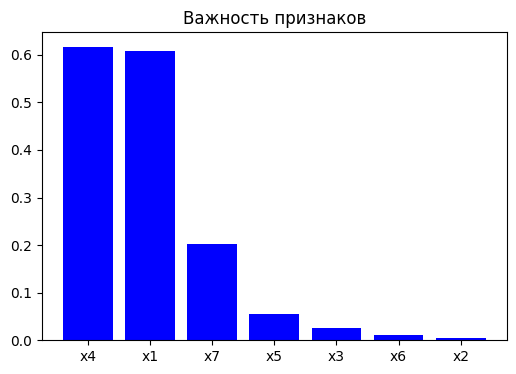

In [285]:
plt.figure(figsize = (6,4))
plt.bar(['x4','x1','x7','x5','x3','x6','x2'], importances[indices],
        align = 'center', color = 'blue')
plt.title("Важность признаков")